# Plots the DFT ground state energy of the combined hBN-water system as a function of supercell size.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def make_df(data_path):
    df = pd.read_table(
        data_path,
        delim_whitespace=True,
        header=None,
        names=[
            "system",
            "num_atoms",
            "functional",
            "ecp",
            "ecut_ev",
            "Nk",
            "Ns",
            "total_energy_ryd",
        ],
    )
    return df


def plot_supercell_extrapolation(df):
    system = df["system"].values[0]
    functional = df["functional"].values[0]
    ecp = df["ecp"].values[0]
    ecut_ev = df["ecut_ev"].values[0]
    Nk = df["Nk"].values[0]
    plt.figure(figsize=(5, 5))
    plt.title(
        f"Supercell extrapolation for hBN-water system"
        + f"\n {functional}, {ecp}, E$_{{cut}}$ = {ecut_ev} eV, {Nk}x{Nk}x1 k-mesh"
    )
    plt.xlabel(r"$N_{s_x} \cdot N_{s_y}$")
    plt.ylabel("DFT total energy per atom (eV)")
    plt.plot(
        "supercell_size",
        "total_energy_ev",
        data=df,
        linestyle="solid",
        marker="o",
    )
    plt.savefig(
        f"/Users/Nathan/Desktop/supercell_extrapolation_{system}_{functional}_ecut_{ecut_ev}_{ecp}_Nk_{Nk}.png",
        dpi=300,
        bbox_inches="tight",
    )

In [8]:
data_path = "total_energy_data.txt"
ryd_per_ev = 0.0734986176
df = make_df(data_path)
df["total_energy_ryd_per_atom"] = np.divide(df["total_energy_ryd"].values, df["num_atoms"].values)
df["total_energy_ev"] = (df["total_energy_ryd_per_atom"].values - df["total_energy_ryd_per_atom"].values[-1]) / ryd_per_ev
df["supercell_size"] = np.power(df["Ns"].values, 2)
df

,system,num_atoms,functional,ecp,ecut_ev,Nk,Ns,total_energy_ryd,total_energy_ryd_per_atom,total_energy_ev,supercell_size
0,hBN_water_Oup_Hdown,11,pbe,paw,700,3,1,-203.488394,-18.498945,18.444472,1
1,hBN_water_Oup_Hdown,35,pbe,paw,700,3,2,-681.869050,-19.481973,5.069691,4
2,hBN_water_Oup_Hdown,75,pbe,paw,700,3,3,-1479.158567,-19.722114,1.802400,9
3,hBN_water_Oup_Hdown,131,pbe,paw,700,3,4,-2595.362126,-19.811925,0.580467,16
4,hBN_water_Oup_Hdown,203,pbe,paw,700,3,5,-4030.481388,-19.854588,0.000000,25


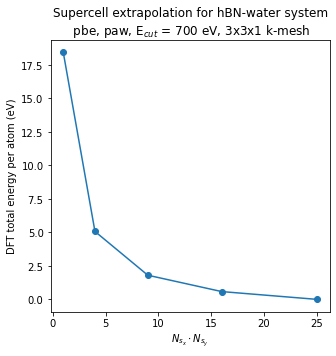

In [9]:
plot_supercell_extrapolation(df)